# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import csv

import datetime
d = datetime.datetime.today()
today = (f"{d.year}/{d.month}/{d.day}")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['klaksvik', 'azanja', 'punta arenas', 'provideniya', 'hithadhoo', 'mantua', 'kaitangata', 'rikitea', 'marolambo', 'amderma', 'brigantine', 'menongue', 'dafeng', 'hobart', 'longyearbyen', 'dikson', 'bar harbor', 'labuhan', 'taolanaro', 'yar-sale', 'kizukuri', 'marsabit', 'ponta delgada', 'presidencia roque saenz pena', 'dudinka', 'oksfjord', 'ushuaia', 'mataura', 'karratha', 'mar del plata', 'longyan', 'constantine', 'jamestown', 'yarada', 'barentsburg', 'new norfolk', 'bonavista', 'broome', 'saldanha', 'puerto ayora', 'bambous virieux', 'genhe', 'saint-philippe', 'alyangula', 'avarua', 'airai', 'saint george', 'jalu', 'pangai', 'kodiak', 'albany', 'two hills', 'comodoro rivadavia', 'saleaula', 'cidreira', 'pauini', 'cape town', 'monte cristi', 'lorengau', 'phan rang', 'bluff', 'beira', 'fort nelson', 'aklavik', 'saskylakh', 'hilo', 'fairbanks', 'illoqqortoormiut', 'castro', 'boa vista', 'san cristobal', 'atuona', 'pacific grove', 'kapaa', 'cherskiy', 'saint-augustin', 'georgetown', 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

of_set = 1
record = 0

city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units=Imperial"
    weather_response = requests.get(query_url).json()
    
    if record < 50:
        record += 1
    else:
        of_set += 1 
        record = 1
    
    print(f"Processing Record {record} of set {of_set} | {city}.")
    
    try:
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])      
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_list.append(city)

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | klaksvik.
Processing Record 2 of set 1 | azanja.
Processing Record 3 of set 1 | punta arenas.
Processing Record 4 of set 1 | provideniya.
Processing Record 5 of set 1 | hithadhoo.
Processing Record 6 of set 1 | mantua.
Processing Record 7 of set 1 | kaitangata.
Processing Record 8 of set 1 | rikitea.
Processing Record 9 of set 1 | marolambo.
Processing Record 10 of set 1 | amderma.
Missing field/result... skipping.
Processing Record 11 of set 1 | brigantine.
Processing Record 12 of set 1 | menongue.
Processing Record 13 of set 1 | dafeng.
Processing Record 14 of set 1 | hobart.
Processing Record 15 of set 1 | longyearbyen.
Processing Record 16 of set 1 | dikson.
Processing Record 17 of set 1 | bar harbor.
Processing Record 18 of set 1 | labuhan.
Processing Record 19 of set 1 | taolanaro.
Missing field/result... skipping.
Processing Record 20 of set 1 | yar-sale.
Processing Record 2

Processing Record 29 of set 4 | pevek.
Processing Record 30 of set 4 | tsihombe.
Missing field/result... skipping.
Processing Record 31 of set 4 | da nang.
Missing field/result... skipping.
Processing Record 32 of set 4 | ayagoz.
Processing Record 33 of set 4 | peniche.
Processing Record 34 of set 4 | ribeira grande.
Processing Record 35 of set 4 | marcona.
Missing field/result... skipping.
Processing Record 36 of set 4 | codrington.
Processing Record 37 of set 4 | omboue.
Processing Record 38 of set 4 | daxian.
Missing field/result... skipping.
Processing Record 39 of set 4 | manokwari.
Processing Record 40 of set 4 | hobyo.
Processing Record 41 of set 4 | cardston.
Processing Record 42 of set 4 | pearl.
Processing Record 43 of set 4 | sobolevo.
Processing Record 44 of set 4 | rungata.
Missing field/result... skipping.
Processing Record 45 of set 4 | lavrentiya.
Processing Record 46 of set 4 | strezhevoy.
Processing Record 47 of set 4 | salinopolis.
Processing Record 48 of set 4 | kam

Processing Record 8 of set 8 | wangqing.
Processing Record 9 of set 8 | khandbari.
Processing Record 10 of set 8 | berberati.
Processing Record 11 of set 8 | mariestad.
Processing Record 12 of set 8 | havre-saint-pierre.
Processing Record 13 of set 8 | clyde river.
Processing Record 14 of set 8 | severo-kurilsk.
Processing Record 15 of set 8 | teknaf.
Processing Record 16 of set 8 | sambava.
Processing Record 17 of set 8 | esperance.
Processing Record 18 of set 8 | komsomolskiy.
Processing Record 19 of set 8 | hinton.
Processing Record 20 of set 8 | semey.
Processing Record 21 of set 8 | college.
Processing Record 22 of set 8 | korem.
Processing Record 23 of set 8 | cootehill.
Processing Record 24 of set 8 | san quintin.
Processing Record 25 of set 8 | dianopolis.
Missing field/result... skipping.
Processing Record 26 of set 8 | muisne.
Processing Record 27 of set 8 | bako.
Processing Record 28 of set 8 | port-gentil.
Processing Record 29 of set 8 | katsuura.
Processing Record 30 of se

Processing Record 37 of set 11 | wahran.
Missing field/result... skipping.
Processing Record 38 of set 11 | vestmannaeyjar.
Processing Record 39 of set 11 | cangzhou.
Processing Record 40 of set 11 | muriwai beach.
Processing Record 41 of set 11 | kieta.
Processing Record 42 of set 11 | ahipara.
Processing Record 43 of set 11 | faanui.
Processing Record 44 of set 11 | tessalit.
Processing Record 45 of set 11 | popondetta.
Processing Record 46 of set 11 | cururupu.
Processing Record 47 of set 11 | colonelganj.
Processing Record 48 of set 11 | ozgon.
Missing field/result... skipping.
Processing Record 49 of set 11 | khani.
Processing Record 50 of set 11 | smithers.
Processing Record 1 of set 12 | sola.
Processing Record 2 of set 12 | burlington.
Processing Record 3 of set 12 | tura.
Processing Record 4 of set 12 | bilma.
Processing Record 5 of set 12 | la ronge.
Processing Record 6 of set 12 | kursk.
Processing Record 7 of set 12 | priiskovyy.
Processing Record 8 of set 12 | jiangyou.
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [4]:
#Converting to dataframe
weather_df = pd.DataFrame({
    "City":city_list,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lon":lon,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})

#Printing Counts
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lon           563
Max Temp      563
Wind Speed    563
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,klaksvik,90,FO,1573152839,74,62.23,-6.59,33.80,8.05
1,azanja,100,RS,1573152839,87,44.43,20.88,53.60,4.70
2,punta arenas,85,CL,1573152839,72,-53.16,-70.91,43.20,26.82
3,provideniya,1,RU,1573152839,84,64.42,-173.23,19.94,14.18
4,hithadhoo,66,MV,1573152839,70,-0.60,73.08,82.45,9.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

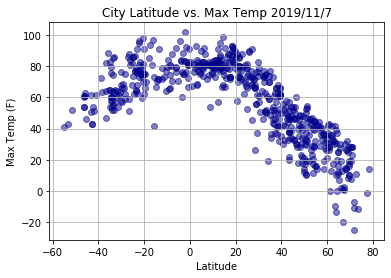

In [6]:
# Plot Titles (with date of analysis) and Axes Labels.
fig, ax = plt.subplots()
plt.scatter(x=lat, y=max_temp, marker = "o", color="DarkBlue", alpha=0.5)
plt.title(f"City Latitude vs. Max Temp {today}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
ax.grid()
plt.savefig('City Latitude vs. Max Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

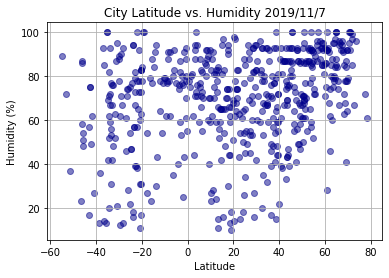

In [7]:
# Plot Titles (with date of analysis) and Axes Labels.
fig, ax = plt.subplots()
plt.scatter(x=lat, y=humidity, marker = "o", color="DarkBlue", alpha=0.5)
plt.title(f'City Latitude vs. Humidity {today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid = True
ax.grid()
plt.savefig('City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

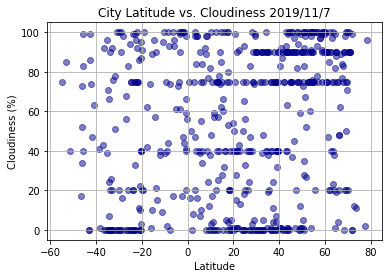

In [8]:
# Plot Titles (with date of analysis) and Axes Labels.
fig, ax = plt.subplots()
plt.scatter(x=lat, y=cloudiness, marker = "o", color="DarkBlue", alpha=0.5)
plt.title(f'City Latitude vs. Cloudiness {today}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid = True
ax.grid()
plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

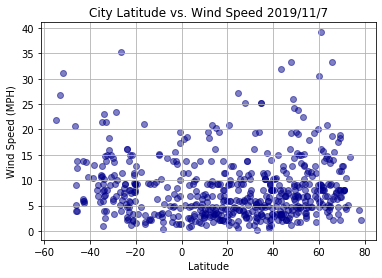

In [9]:
# Plot Titles (with date of analysis) and Axes Labels.
fig, ax = plt.subplots()
plt.scatter(x=lat, y=wind_speed, marker = "o", color="DarkBlue", alpha=0.5)
plt.title(f'City Latitude vs. Wind Speed {today}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid = True
ax.grid()
plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()